In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [59]:
fruit=pd.read_table('assets/fruit_data_with_colors.txt')
fruit.head(150)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [9]:
lookup_fruit=dict(zip(fruit.fruit_label.unique(),fruit.fruit_name.unique()))
lookup_fruit

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [36]:
fruit['mass'].unique()

array([192, 180, 176,  86,  84,  80,  76, 178, 172, 166, 154, 164, 152,
       156, 168, 162, 160, 140, 170, 342, 356, 362, 204, 158, 210, 190,
       142, 150, 144, 194, 200, 186, 216, 196, 174, 132, 130, 116, 118,
       120], dtype=int64)

In [43]:
fruit['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [51]:
fruit(fruit['fruit_name'] >)

TypeError: 'DataFrame' object is not callable

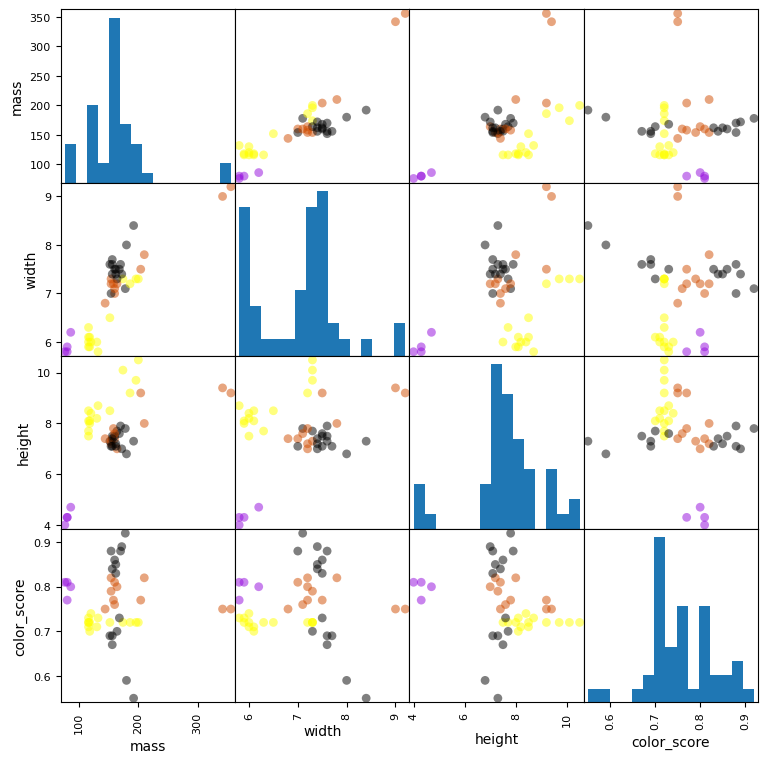

In [11]:
#plotting scatter matrix
X=fruit[['mass','width','height','color_score']]
y=fruit['fruit_label']
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

from matplotlib  import cm
cmap=cm.get_cmap('gnuplot')

scatter=pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

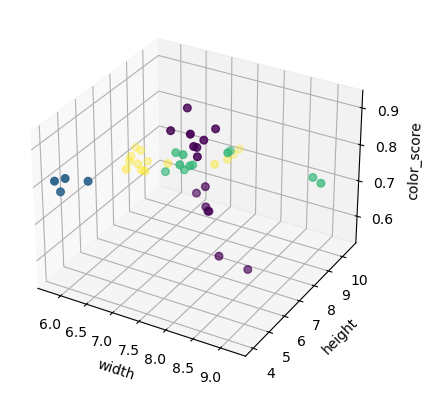

In [19]:
#plotting 3d scatterplot
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'], c=y_train, s=30)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [20]:
X=fruit[['mass','width','height']]
y=fruit['fruit_label']
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
knn.score(X_test,y_test)

C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5333333333333333

In [29]:
fruit_prediction=knn.predict([[20,4.3,5.5]])
lookup_fruit[fruit_prediction[0]]

C:\Users\qw\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'mandarin'

In [64]:
fruit_predictiomn=knn.predict([[100,6.3,8.5]])
lookup_fruit[fruit_prediction[0]]

C:\Users\qw\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\qw\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'mandarin'